<a href="https://colab.research.google.com/github/Danielhay016/Advanced-NLP-with-Python-for-Machine-Learning/blob/main/NLP_C2_challenges.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#1: Load Resources

#Install spaCy
!pip install spacy

#Download the English language model for spaCy
!python -m spacy download en_core_web_sm #English

#import pandas as pd
import pandas as pd #working with tables - DataFrames help us load the CSV files, pd is the object we are going to use

#Import spaCy
import spacy #used for NLP function (load, model, etc.)

#Load the English model
nlp = spacy.load("en_core_web_sm") #load the spacy model - The nlp is a Pipeline NLP Object – through which text is processed

print("ok")

#When you execute nlp = spacy.load('en'), spaCy downloads and loads the pre-trained English language model into memory,
#assigning it to the variable nlp. This pre-trained model contains information about word vectors, part-of-speech tags,
#syntactic dependencies, and other linguistic features necessary for various NLP tasks.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 88.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
ok


In [ ]:
#EXERCISE - Build a Simple Processing Pipeline

# Keep this
text = "A customer in New York City wants to give a review."
doc = nlp(text)


#Processing Pipeline Order

#Tokenization
print("Tokenization and thire Lemmatization & POS without STOP word:")
for token in doc: #sentence broken into words, punctuation marks. (tokens)
    #Stop Words Removal
 if not token.is_stop:
     #POS Tagging
    print(token.text , token.pos_ ,  token.lemma_ ) #token.text --> bring the word\mark , token.pos_ --> POS Tagging (NOUN, VERB, ADJ),token.lemma_ --> Reverting each word to its root form (e.g. wants → want).

print("\n")

#Dependence Parsing --> Finding the grammatical connections between words.
print("Dependence:")
for token in doc:
    print(token.text, "->", token.dep_, "->", token.head.text) #word (from the doc) --> dep word --> the next word that relevant to the 1st word

print("\n")

#Lemmatization --> Reverting each word to its root form (e.g. wants → want).
print("Lemmatization:")
for token in doc:
    print(token.text, "->", token.lemma_)

print("\n")

#Named Entity Recognition --> Identifying names of places, people, dates, etc.
print("NER:")
for ent in doc.ents:
    print(ent.text, ent.label_)

Tokenization and thire Lemmatization & POS without STOP word:
customer NOUN customer
New PROPN New
York PROPN York
City PROPN City
wants VERB want
review NOUN review
. PUNCT .


Dependence:
A -> det -> customer
customer -> nsubj -> wants
in -> prep -> customer
New -> compound -> York
York -> compound -> City
City -> pobj -> in
wants -> ROOT -> wants
to -> aux -> give
give -> xcomp -> wants
a -> det -> review
review -> dobj -> give
. -> punct -> wants


Lemmatization:
A -> a
customer -> customer
in -> in
New -> New
York -> York
City -> City
wants -> want
to -> to
give -> give
a -> a
review -> review
. -> .


NER:
New York City GPE


In [ ]:
 #3: Build a Processing Pipeline with a File
 # Run this cell

file_path = '/content/sentiment_examples.txt'
with open(file_path, 'r', encoding='utf-8') as file:
    sentiment_texts = file.readlines()

In [ ]:
# EXERCISE - SCROLL DOWN TO THE "START HERE" SECTION BELOW.

# Initialize empty lists to store the results
token_lists = []
filtered_token_lists = []
pos_tag_lists = []
ner_lists = []

#-----------------------------------------------------------------------------
# START HERE

# Process each sentiment example using spaCy and store the results
for sentiment_text in sentiment_texts: # each line every time !!
    doc = nlp(sentiment_text.strip())  # Strip any leading/trailing whitespace

    # Tokenization
    tokens = [token.text for token in doc]  # Extract tokens from the processed text
    token_lists.append(tokens)  # Append tokens list to token_lists
    #Creates a list of tokens and appending it to the token_lists list.
    #This is done to store the tokens for each sentiment example.


    # Stop Word Removal filter
    filtered_tokens = [token.text for token in doc if not token.is_stop]  # Filter out stop words
    filtered_token_lists.append(filtered_tokens)  # Append filtered tokens list to filtered_token_lists


    # Part-of-Speech Tagging (POS tagging)
    pos_tags = [(token.text, token.pos_) for token in doc]  # Extract token text and POS tags
    pos_tag_lists.append(pos_tags)  # Append POS tags list to pos_tag_lists


    # Named Entity Recognition (NER)
    ner_entities = [(ent.text, ent.label_) for ent in doc.ents]  # Extract named entities and their labels
    ner_lists.append(ner_entities)  # Append named entities list to ner_lists


#-----------------------------------------------------------------------------
# Create a DataFrame to organize the results - Table!
results_df = pd.DataFrame({
    'Sentiment Example': sentiment_texts,
    'Tokens': token_lists,
    'Filtered Tokens': filtered_token_lists,
    'POS Tags': pos_tag_lists,
    'Named Entities': ner_lists
})

# Display the DataFrame
print(results_df)

                                   Sentiment Example  \
0  "I love the new features of your product! It h...   
1  "The customer support was exceptional in New Y...   
2  "The quality of your service exceeded my expec...   
3  "I'm extremely satisfied with my purchase. The...   
4  "The user interface is intuitive and easy to n...   
5  "I had a positive experience shopping on your ...   
6  "Your company values customer feedback, and it...   
7  "The pricing is fair, and the value I get in r...   
8  "I appreciate the personalized recommendations...   
9  "The delivery was prompt, and the packaging wa...   

                                              Tokens  \
0  [", I, love, the, new, features, of, your, pro...   
1  [", The, customer, support, was, exceptional, ...   
2  [", The, quality, of, your, service, exceeded,...   
3  [", I, 'm, extremely, satisfied, with, my, pur...   
4  [", The, user, interface, is, intuitive, and, ...   
5  [", I, had, a, positive, experience, shoppin

In [ ]:
results_df.to_csv('processed_data.csv', index=False)
results_df.to_excel('processed_data.xlsx', index=False)

In [ ]:
processed_df = pd.read_csv('/content/processed_data.csv', encoding='latin-1')

In [ ]:
processed_df.head()

,Sentiment Example,Tokens,Filtered Tokens,POS Tags,Named Entities
0,"""I love the new features of your product! It h...","['""', 'I', 'love', 'the', 'new', 'features', '...","['""', 'love', 'new', 'features', 'product', '!...","[('""', 'PUNCT'), ('I', 'PRON'), ('love', 'VERB...",[]
1,"""The customer support was exceptional in New Y...","['""', 'The', 'customer', 'support', 'was', 'ex...","['""', 'customer', 'support', 'exceptional', 'N...","[('""', 'PUNCT'), ('The', 'DET'), ('customer', ...","[('New York', 'GPE')]"
2,"""The quality of your service exceeded my expec...","['""', 'The', 'quality', 'of', 'your', 'service...","['""', 'quality', 'service', 'exceeded', 'expec...","[('""', 'PUNCT'), ('The', 'DET'), ('quality', '...","[('Prague', 'GPE')]"
3,"""I'm extremely satisfied with my purchase. The...","['""', 'I', ""'m"", 'extremely', 'satisfied', 'wi...","['""', 'extremely', 'satisfied', 'purchase', '....","[('""', 'PUNCT'), ('I', 'PRON'), (""'m"", 'AUX'),...",[]
4,"""The user interface is intuitive and easy to n...","['""', 'The', 'user', 'interface', 'is', 'intui...","['""', 'user', 'interface', 'intuitive', 'easy'...","[('""', 'PUNCT'), ('The', 'DET'), ('user', 'NOU...",[]


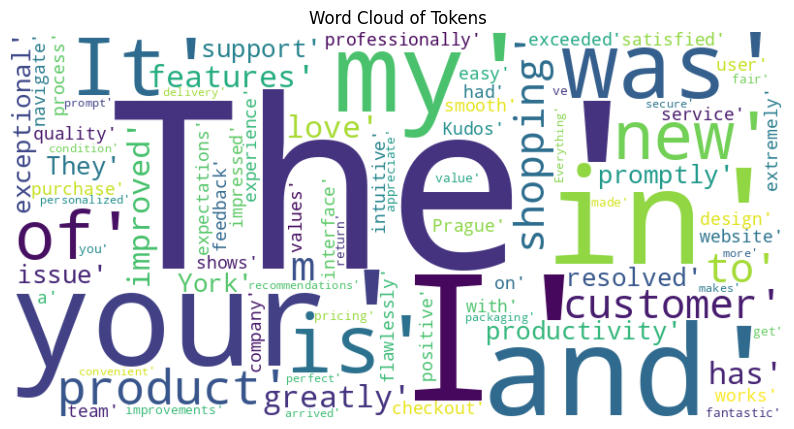

In [ ]:
from wordcloud import WordCloud

# Combine all tokens into a single text
all_tokens = ' '.join(processed_data['Tokens'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tokens)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axis
plt.title('Word Cloud of Tokens')
plt.show()



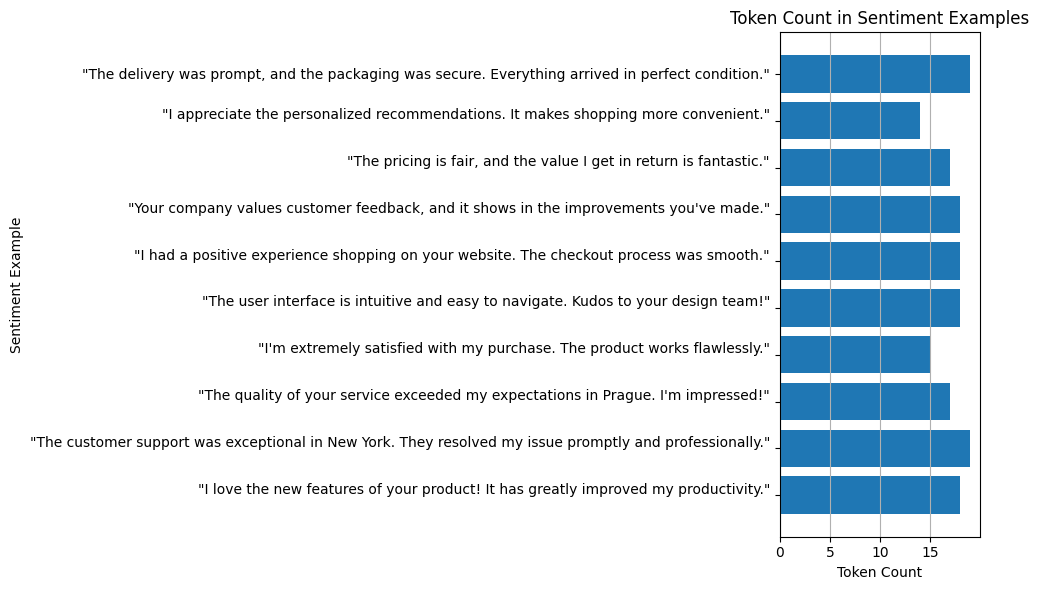

In [ ]:
import matplotlib.pyplot as plt

# Load the processed data from the CSV file
file_path = '/content/processed_data.csv'  # Update with the path to your processed data CSV file
processed_data = pd.read_csv(file_path)

# Calculate the count of tokens for each sentiment example
token_counts = processed_data['Tokens'].apply(lambda x: len(x.split()))

# Create a bar chart
plt.figure(figsize=(10, 6))  # Set the figure size
plt.barh(processed_data['Sentiment Example'], token_counts)  # Horizontal bar chart
plt.xlabel('Token Count')  # X-axis label
plt.ylabel('Sentiment Example')  # Y-axis label
plt.title('Token Count in Sentiment Examples')  # Chart title
plt.grid(axis='x')  # Show grid lines on the x-axis
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

/tmp/ipython-input-1523610604.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()  # Adjust layout to prevent overlapping labels


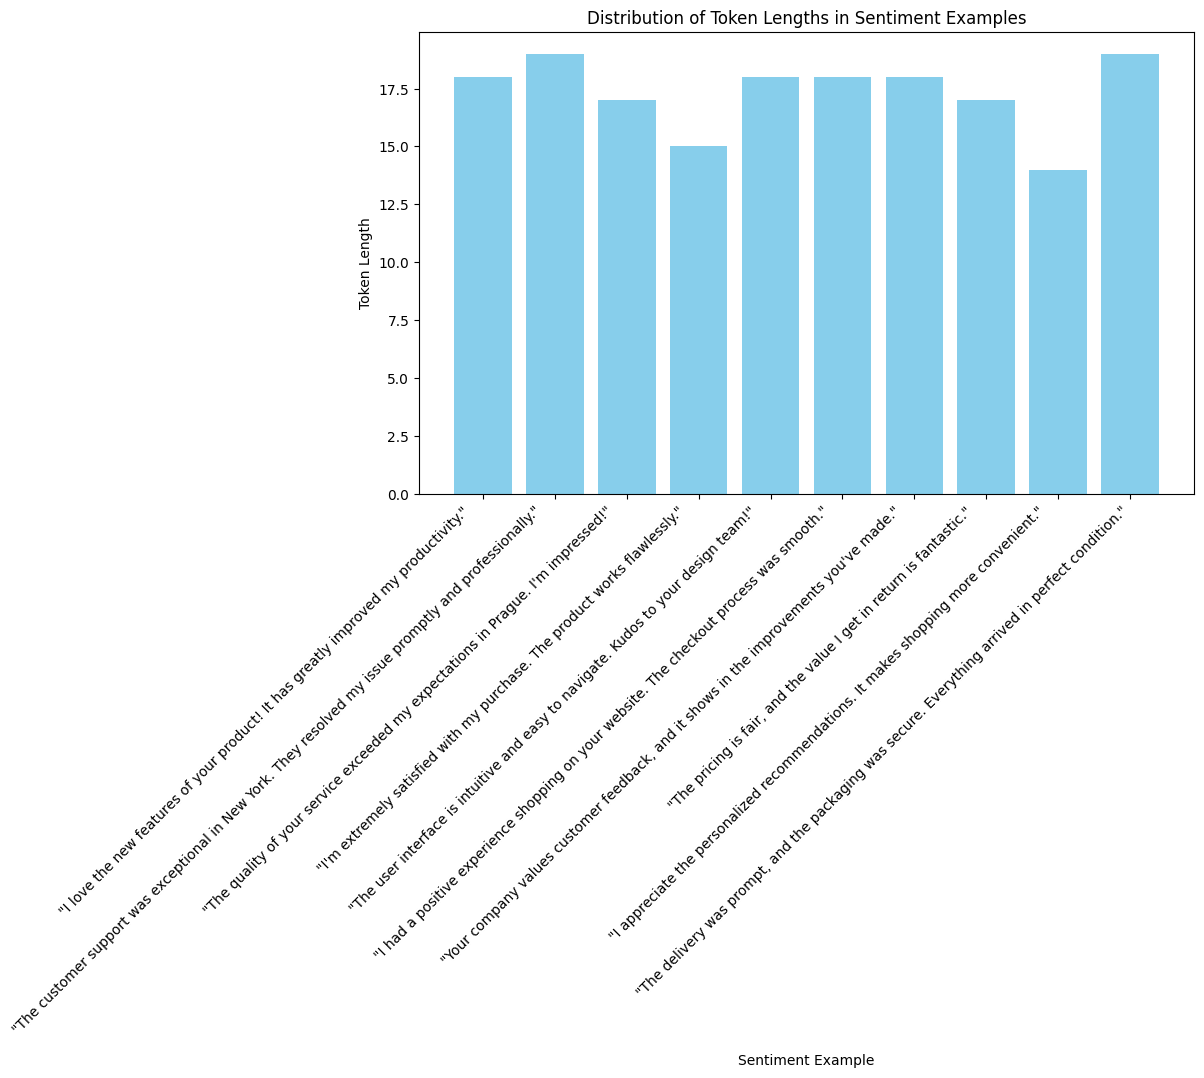

In [ ]:
# Load the processed data from the CSV file
file_path = 'processed_data.csv'  # Update with the path to your processed data CSV file
processed_data = pd.read_csv(file_path)

# Calculate token lengths for each sentiment example
processed_data['Token Length'] = processed_data['Tokens'].apply(lambda x: len(x.split()))

# Create a bar chart to visualize token lengths
plt.figure(figsize=(10, 6))
plt.bar(processed_data['Sentiment Example'], processed_data['Token Length'], color='skyblue')
plt.xlabel('Sentiment Example')
plt.ylabel('Token Length')
plt.title('Distribution of Token Lengths in Sentiment Examples')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()